In [61]:
#reducción de dimensionalidad con PCA
from sklearn.decomposition import PCA

#print reviews[:int(100),[1,2,3,5,6,8]]

pca = PCA(n_components=2)
pca.fit(reviews_beers[:int(100),[1,2,3,5,6,8]])
beers = pca.transform(reviews_beers[:int(100),[1,2,3,5,6,8]])

pca.fit(reviews_beweries[:int(100),[1,2,3,5,6,8]])
beweries = pca.transform(reviews_beweries[:int(100),[1,2,3,5,6,8]])

data = [beers, beweries]

In [62]:
print beers[:10]
print beweries[:10]
print data[:10]

[[ 4.11725798  2.30810863]
 [ 1.48717882  1.31303839]
 [ 1.28186801  1.52423615]
 [ 2.18615392  0.40076369]
 [-1.70319427  0.50381067]
 [ 1.84856372 -0.21680032]
 [ 1.17576102 -0.91524555]
 [ 2.57379712  0.28310071]
 [ 1.3776996  -0.88436638]
 [ 0.57992967 -1.77486222]]
[[-1.58976971  0.20285081]
 [ 2.00905813  0.43418867]
 [ 1.56716088 -0.41481248]
 [ 2.56676194  1.09429381]
 [ 1.73342619 -0.34457547]
 [ 1.24612073 -1.39551104]
 [ 0.65108319 -1.75428544]
 [ 1.33722903 -0.76915605]
 [ 1.68417861  0.19193404]
 [ 1.61045808 -0.00735535]]
[array([[  4.11725798e+00,   2.30810863e+00],
       [  1.48717882e+00,   1.31303839e+00],
       [  1.28186801e+00,   1.52423615e+00],
       [  2.18615392e+00,   4.00763687e-01],
       [ -1.70319427e+00,   5.03810668e-01],
       [  1.84856372e+00,  -2.16800322e-01],
       [  1.17576102e+00,  -9.15245550e-01],
       [  2.57379712e+00,   2.83100707e-01],
       [  1.37769960e+00,  -8.84366380e-01],
       [  5.79929669e-01,  -1.77486222e+00],
       

Tiempo promedio:  0.00199250380198 [s]


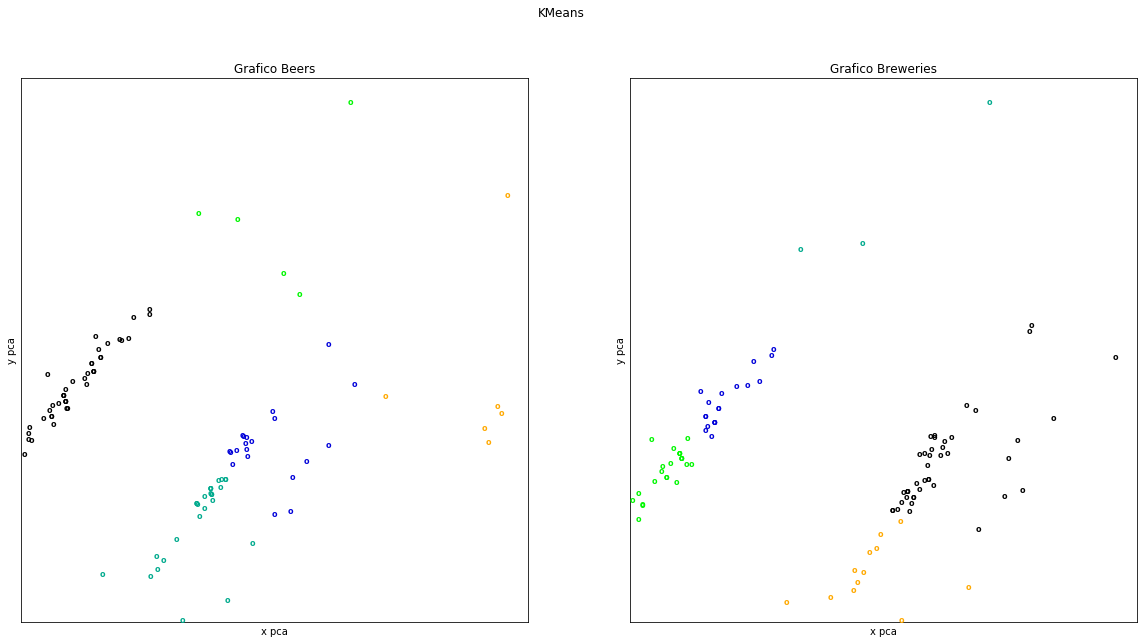

In [63]:
#K-means for beers
from sklearn.cluster import KMeans

titles = ["Beers", "Breweries"]
tiempo = 0

#Vizualitation
fig = plt.figure(figsize = (20,10))
fig.suptitle('KMeans')

for X,i in zip(data, range(2)):
    start_time = time()

    k_means = KMeans(init="k-means++", n_clusters = 5, n_init = 2)#, tol=0.0001, max_iter=30) 5 
    k_means.fit(X)

    final_time = time() - start_time
    tiempo += final_time
    k_means_labels = k_means.labels_

    x_min, x_max = np.min(X, axis = 0), np.max(X, axis = 0)
    X = (X - x_min) / (x_max - x_min)

    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")
    plt.title("Grafico " + titles[i])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.axis([0, 1.05, 0, 1.05])

    #Visualitation (in 2D).
    for j in range(X.shape[0]):
        plt.text(X[j,0], X[j,1], "o",
        color=plt.cm.spectral(k_means_labels[j]/5.1),
        fontdict={'weight': 'bold', 'size': 8})

print "Tiempo promedio: ", tiempo/6,"[s]"
plt.show()

Tiempo promedio:  0.00946613152822 [s]


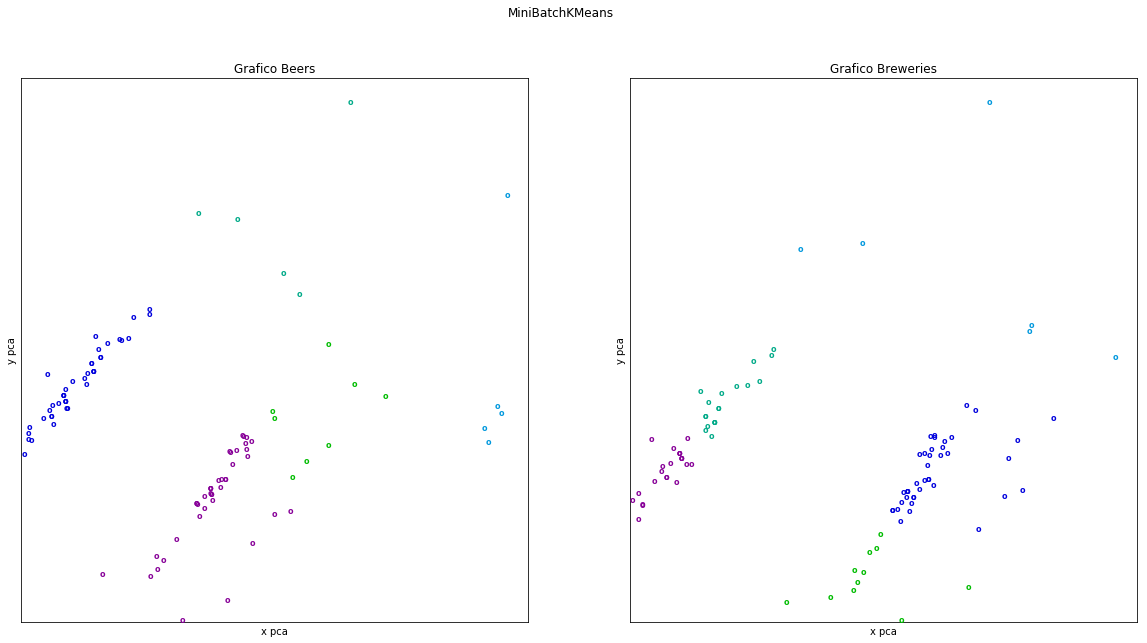

In [64]:
#Minibatch k-means 
from sklearn.cluster import MiniBatchKMeans

tiempo = 0
#Vizualitation
fig = plt.figure(figsize = (20,10))
fig.suptitle('MiniBatchKMeans')

#Running K-Means
for X,i in zip(data, range(2)):
    start_time = time()
    #print X
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=5, n_init=10)#, max_no_improvement=20, batch_size=50, reassignment_ratio=0.2)
    mbk.fit(X)
    
    final_time = time() - start_time
    tiempo += final_time
    mbk_labels = mbk.labels_

    x_min, x_max = np.min(X, axis = 0), np.max(X, axis = 0)
    X = (X - x_min) / (x_max - x_min)
    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")
    plt.title("Grafico " + titles[i] )
    ax.set_xticks(())
    ax.set_yticks(())
    ax.axis([0, 1.05, 0, 1.05])

    for j in range(X.shape[0]):
        plt.text(X[j,0], X[j,1], "o",
        color=plt.cm.spectral(mbk_labels[j]/10.+0.1),
        fontdict={'weight': 'bold', 'size': 8})


print "Tiempo promedio: ", tiempo/6,"[s]"
plt.show()

[0, 1, 2, 3, 4]
Tiempo de ejecucion: 0.000815510749817 [s]


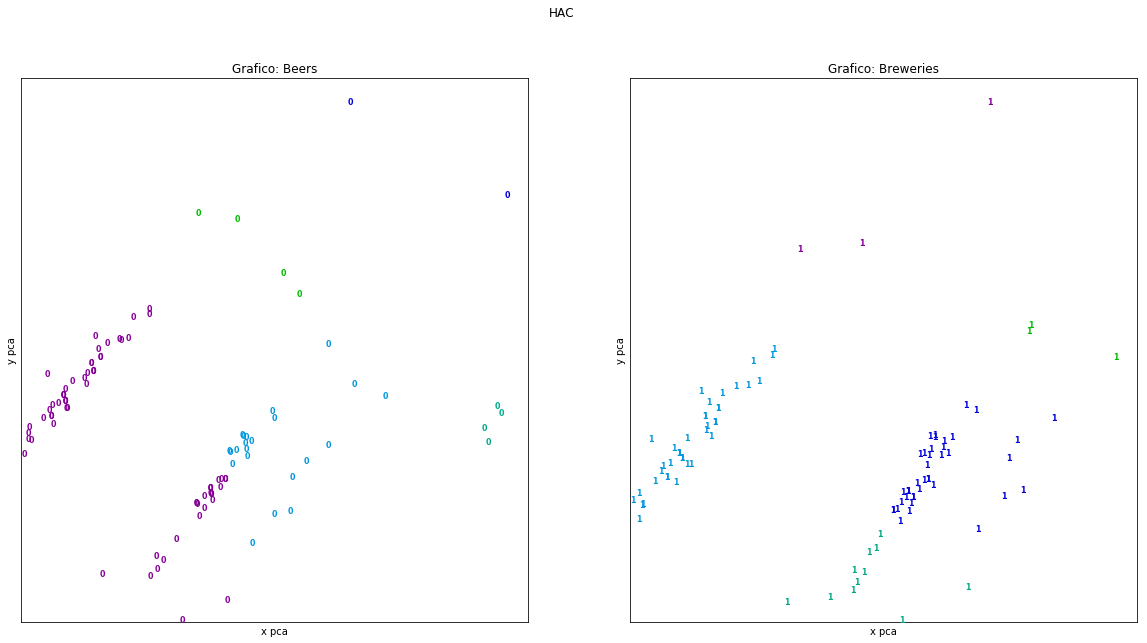

In [65]:
#HAC
from sklearn.cluster import AgglomerativeClustering as hac

fig = plt.figure(figsize = (20,10))
fig.suptitle('HAC')
y=range(5)
print y
tiempo=[]
j=0
for X,i in zip(data,range(2)):
    #Agglomerative Clustering
    start_time = time()	
    clustering = hac(linkage = "complete", n_clusters = 5, affinity="euclidean")
    clustering.fit(X)

    final_time = time() - start_time
    tiempo.append(final_time)

    HAC_labels = clustering.labels_

    #Normalization
    x_min, x_max = np.min(X, axis = 0), np.max(X, axis = 0)
    X = (X - x_min) / (x_max - x_min)
    
    #Visualitation
    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")

    plt.title( 'Grafico: ' + titles[i] )

    
    for i in range(X.shape[0]):
        plt.text(X[i,0], X[i,1], str(y[j]),
        color=plt.cm.spectral(clustering.labels_[i]/10.+0.1),
        fontdict={'weight': 'bold', 'size': 8})
    j = j+1

    ax.set_xticks(())
    ax.set_yticks(())
    ax.axis([0,1.05,0,1.05])

print "Tiempo de ejecucion:", np.median(tiempo),"[s]"
plt.show()

#dendrograms for ward
fig = plt.figure(figsize = (20,10))
fig.suptitle('Dendrograms')
for X,i in zip(data,range(2)):
    
    #Visualitation
    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")
    plt.title( 'Grafico: ' + titles[i] )
    
    #Building dendrogram
    Z = linkage(X,"ward")
    dendrogram(Z,leaf_rotation=90,leaf_font_size=1)
plt.show()

Tiempo de ejecucion: 0.00234591960907 [s]


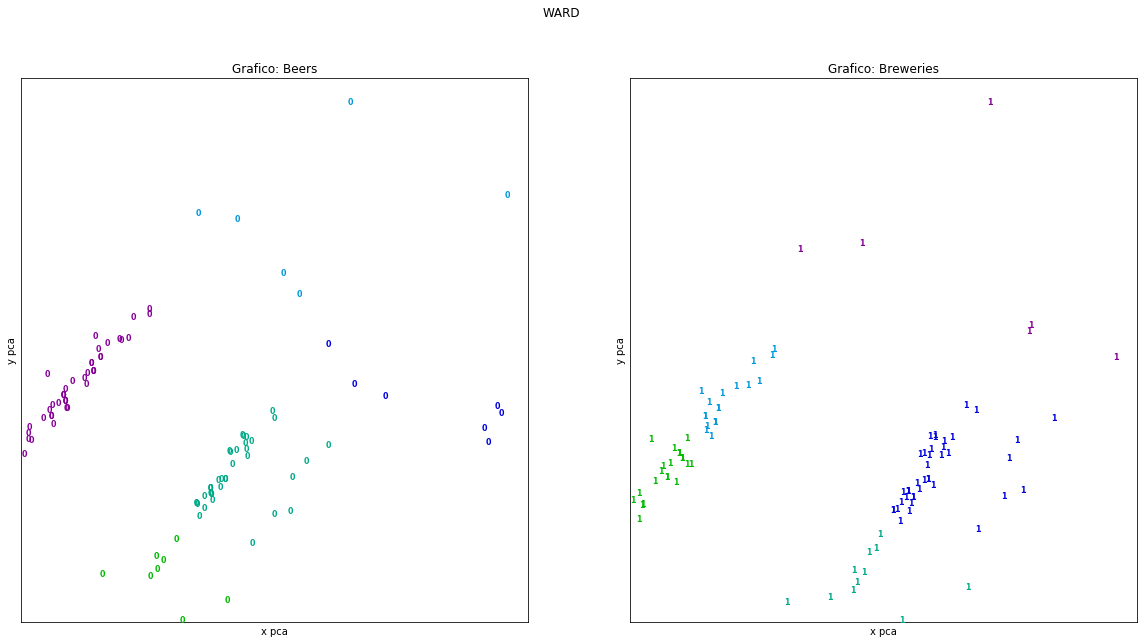

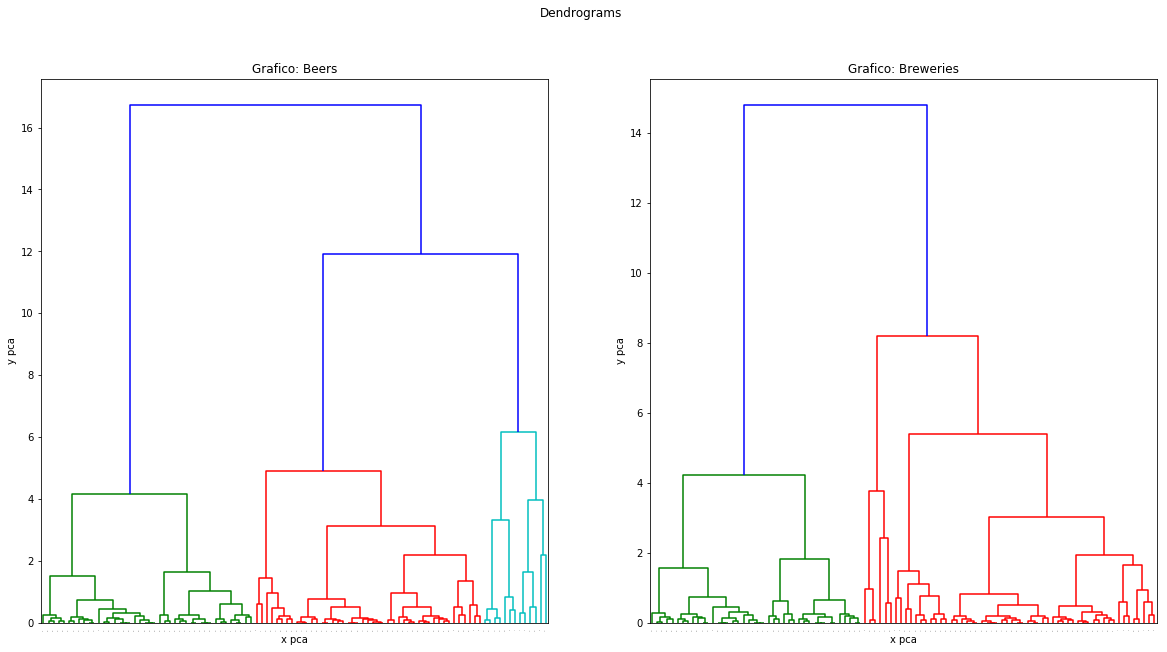

In [145]:
#WARD
from sklearn.cluster import AgglomerativeClustering as hac
from scipy.cluster.hierarchy import dendrogram,linkage

fig = plt.figure(figsize = (20,10))
fig.suptitle('WARD')

tiempo=[]
j=0


for X,i in zip(data,range(2)):
    #Agglomerative Clustering
    start_time = time()	
    clustering = hac(linkage = "ward", n_clusters = 5, affinity="euclidean")
    clustering.fit(X)

    final_time = time() - start_time
    tiempo.append(final_time)

    HAC_labels = clustering.labels_

    #Normalization
    x_min, x_max = np.min(X, axis = 0), np.max(X, axis = 0)
    X = (X - x_min) / (x_max - x_min)
    
    
    
    #Visualitation
    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")

    plt.title( 'Grafico: ' + titles[i] )

    
    for i in range(X.shape[0]):
        plt.text(X[i,0], X[i,1], str(y[j]),
        color=plt.cm.spectral(clustering.labels_[i]/10.+0.1),
        fontdict={'weight': 'bold', 'size': 8})
    j = j+1

    ax.set_xticks(())
    ax.set_yticks(())
    ax.axis([0,1.05,0,1.05])

print "Tiempo de ejecucion:", np.median(tiempo),"[s]"
plt.show()

#dendrograms for ward
fig = plt.figure(figsize = (20,10))
fig.suptitle('Dendrograms')
for X,i in zip(data,range(2)):
    
    #Visualitation
    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")
    plt.title( 'Grafico: ' + titles[i] )
    
    #Building dendrogram
    Z = linkage(X,"ward")
    dendrogram(Z,leaf_rotation=90,leaf_font_size=1)
plt.show()

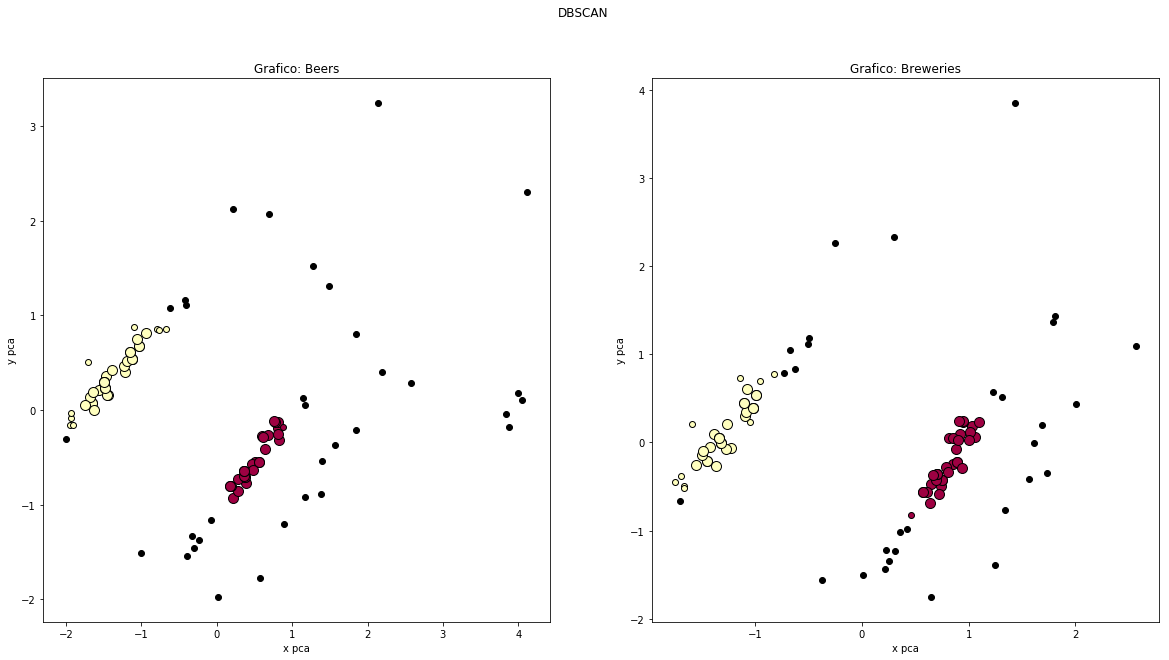

In [138]:

#DBSCAN
from sklearn.cluster import DBSCAN
from matplotlib.ticker import NullFormatter


fig = plt.figure(figsize = (20,10))
fig.suptitle('DBSCAN')


tiempo=[]
j=0
for X,i in zip(data,range(2)):
    
    start_time = time()	
    
    
    db = DBSCAN(eps=0.3, min_samples=10).fit(X)



    final_time = time() - start_time
    tiempo.append(final_time)

    DBSCAN_labels = db.labels_
    
    core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    #Visualitation
    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")

    plt.title( 'Grafico: ' + titles[i] )
    
 
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
        
        xy = X[class_member_mask & ~core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
        
plt.show()


